### Check Reduction

This notebook checks how many entries have been filtered out after removing movies without x-rays.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append("../")
from consts import CLEAN_BASE_DIR, BEFORE_2010_DIR, IN_2010S, AFTER_2020
TARGET_DIR = CLEAN_BASE_DIR

In [4]:
df = pd.DataFrame()

PARSED_METADATA_DIR = "../data/3_metadata_movie_pages_parsed"

for _ in [CLEAN_BASE_DIR, BEFORE_2010_DIR, IN_2010S, AFTER_2020]:
    df = pd.concat([df, pd.read_csv(f"{PARSED_METADATA_DIR}/{_}/meta_en_prime.csv")])

In [5]:
df_links = df[~df['link'].isnull()]
df.shape, df_links.shape

((11138, 14), (11020, 14))

C:\Users\safal\AppData\Local\Temp\ipykernel_8436\3942016705.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['release-year-badge'] = df_filtered1['release-year-badge'].astype(int)


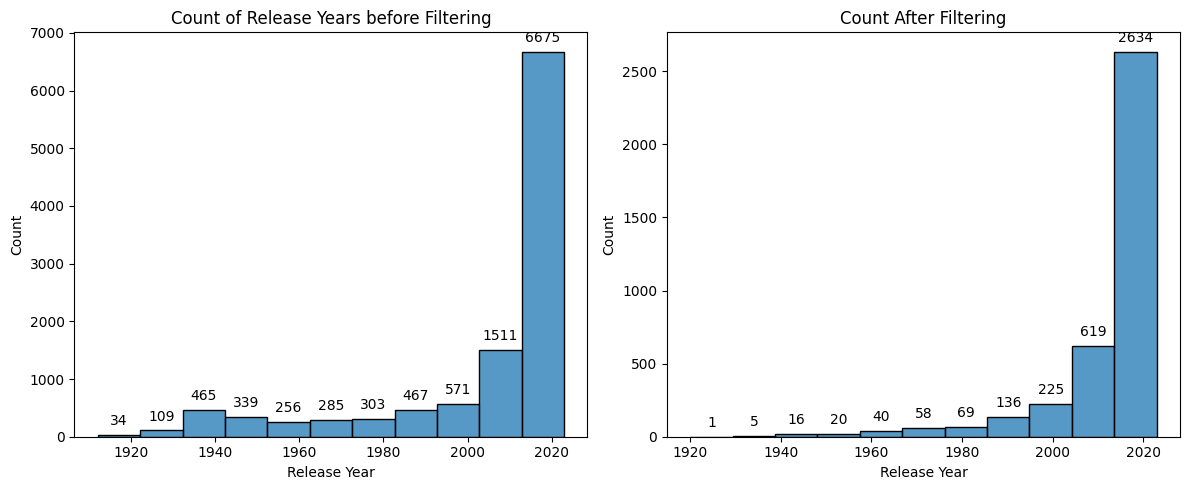

In [6]:
# Assuming df_links is your DataFrame and 'release-year-badge' is the column of interest
df_filtered1 = df_links[~df_links['release-year-badge'].isnull()]
# Convert 'release-year-badge' to integer type
df_filtered1['release-year-badge'] = df_filtered1['release-year-badge'].astype(int)
# df_filtered = df_filtered1[(df_filtered1['x-ray-badge'].isnull())]


# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot 1: Countplot
ax1 = sns.histplot(x='release-year-badge', data=df_filtered1, ax=axes[0], bins=11)
ax1.set_title('Count of Release Years before Filtering')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Count')

# Add count annotations to the first plot
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot 2: Another Countplot (you can modify this based on your second plot)
ax2 = sns.histplot(x='release-year-badge', data=df_filtered1[~df_filtered1['x-ray-badge'].isnull()], ax=axes[1], bins=11)
ax2.set_title('Count After Filtering')
ax2.set_xlabel('Release Year')
ax2.set_ylabel('Count')

# Add count annotations to the second plot
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
# Create a 'decade' column
df_check = df_links.copy()
df_check['decade'] = (df_links['release-year-badge'] // 10) * 10


In [8]:
df_start = pd.DataFrame(df_check['decade'].value_counts())
df_after = pd.DataFrame(df_check[~df_check['x-ray-badge'].isnull()]['decade'].value_counts())

In [9]:

# Merge based on index
merged_df = pd.merge(df_start, df_after, left_index=True, right_index=True)

In [10]:
merged_df.columns=['Before Filter', 'After Filter']
_ = merged_df.sort_index()
_.set_index(_.index.astype(int))

,Before Filter,After Filter
decade,,
1920,62,1
1930,393,8
1940,405,14
1950,256,28
1960,251,45
1970,319,62
1980,392,107
1990,501,166
2000,1081,380
